In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
f = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\Geron2\datasets\titanic'

In [3]:
# set pandas display options to show full table
def set_pandas_display_options() -> None:
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [4]:
train = pd.read_csv(os.path.join(f,'train.csv'), index_col='PassengerId')
test = pd.read_csv(os.path.join(f,'test.csv'), index_col='PassengerId')
print(train.shape,test.shape)

explore = train.copy()

(891, 11) (418, 10)


The attributes have the following meaning:
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: C = Cherbourg, Q = Queenstown, S = Southampton

## 1. Data Exploration

In [5]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Cols having missing values: *Age, cabin, and Embarked***

<br>

In [6]:
# check if classes are evenly distributed
explore.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# investigate age missing rows
train[(train.Age.isna()) & (train.Pclass==3)].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S


**Conclusion: no evidence of missing age due to child-fare**

<br>

In [9]:
explore.pivot_table('Name',columns='Sex',index='Survived',aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [10]:
explore.pivot_table('Name',columns='Embarked',index='Survived',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [10]:
# explore.Ticket.value_counts()

In [11]:
# explore.Ticket.astype(str)

In [12]:
# explore[explore.Ticket.str.len()<7].sort_values(by='Ticket')

In [11]:
explore.Fare = explore.Fare.round(-1)
explore.pivot_table('Name',columns='Fare',index='Survived',aggfunc='count')

Fare,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,110.0,120.0,130.0,140.0,150.0,160.0,210.0,220.0,230.0,250.0,260.0,510.0
Survived,,,,,,,,,,,,,,,,,,,,,,
0,16.0,327.0,54.0,76.0,16.0,17.0,6.0,14.0,8.0,1.0,4.0,NaN,NaN,1.0,3.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN
1,1.0,113.0,46.0,59.0,12.0,13.0,19.0,5.0,23.0,12.0,7.0,4.0,4.0,2.0,6.0,2.0,3.0,NaN,3.0,1.0,4.0,3.0


In [12]:
explore.pivot_table('Age',index='Survived',aggfunc='mean')

,Age
Survived,
0,30.626179
1,28.343690


In [13]:
explore.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,33.01908
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.25032
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,10.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.00000
max,1.000000,3.000000,80.000000,8.000000,6.000000,510.00000


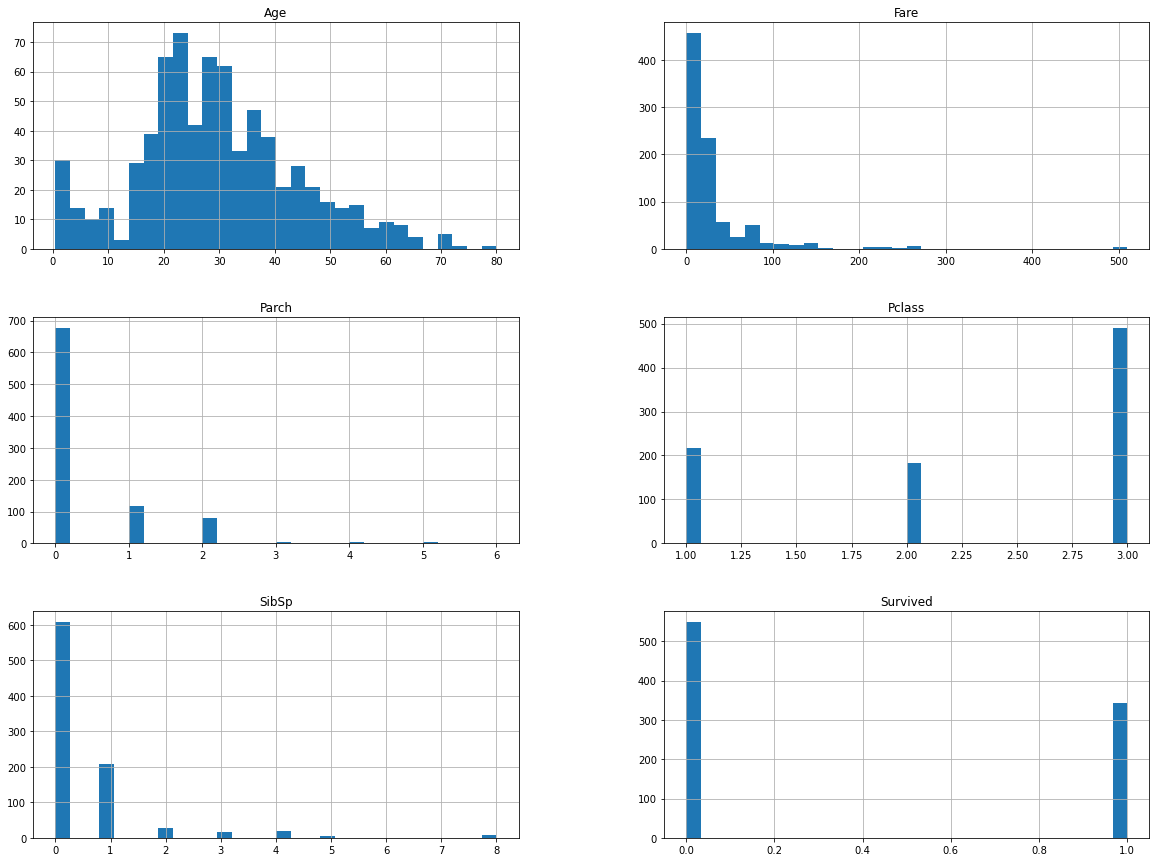

In [15]:
explore.hist(bins=30,figsize=(20,15))
plt.show()

## 2. Feature Engineering 

>**1. process name**

In [33]:
# examine names
noble = ['Duke.','Duchess.','Marquess.','Marchioness.','Lord.','Lady.','Earl.','Countess.','Honourable.',
    'Viscount','Viscountess','Baron','Baroness','Knight.']
Ms = ['Mrs.', 'Miss.']

explore['Noble'] = explore['Name'].str.contains('|'.join(noble))

In [34]:
explore.pivot_table('Name',columns='Noble',index='Survived',aggfunc='count')

Noble,False,True
Survived,,
0,548,1
1,340,2


**Noble not worth it**

> **2. Mean encoding**

In [17]:
# see if the ticket infers cabin and/or price detail
# explore[['Ticket','Cabin','Fare']].sort_values(by='Ticket')

In [18]:
# strip cabin first letter
explore['Cabin1'] = explore.Cabin.str[0]
explore['Cabin1'].value_counts().sort_index()

A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Cabin1, dtype: int64

In [19]:
explore.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin1
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,10.0,NaN,S,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,70.0,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0,NaN,S,NaN


In [20]:
# bin fares into 10 intervals
explore["Fare_bucket"] = explore["Fare"] // 10 * 10
pd.concat([explore[["Fare_bucket", "Survived"]].groupby(['Fare_bucket']).mean(),
           explore[["Fare_bucket", "Survived"]].groupby(['Fare_bucket']).count()], axis=1)

,Survived,Survived
Fare_bucket,,
0.0,0.058824,17
10.0,0.256818,440
20.0,0.460000,100
30.0,0.437037,135
40.0,0.428571,28
50.0,0.433333,30
60.0,0.760000,25
70.0,0.263158,19
80.0,0.741935,31


Conclusion: survivorship positively correlates with ticket price, but correlationship freezes above $60+

In [21]:
# test different binning and combining methods
age_bins = [-10,0,6,20,60,100]
age_labels = ['Ms.','0+','6+','20+','60+']
train.Age.fillna(-5,inplace=True)

fare_bins = [0,10,50,600]
fare_labels = ['$0+','$10+','$50+']


def test_params(df, age_bins=age_bins, age_labels=age_labels, fare_bins=fare_bins, fare_labels=fare_labels):
    df.Age.fillna(-5,inplace=True)
    df.loc[(df['Age']<6) & (df['Age']>=0) & (df['Sex']=='male'),'Sex'] = 'boy'
    df['Age'] = pd.cut(df['Age'],age_bins,labels=age_labels,right=False)
    # fill na for fare
    fare_freq = df['Fare'].value_counts().index[0]
    df['Fare'].fillna(fare_freq, inplace=True)
    df['Fare'] = pd.cut(df["Fare"],fare_bins,labels=fare_labels,right=False)
    df['parch_0'] = (df.Parch == 0).astype(int)
    df['sibsp_0'] = (df.SibSp == 0).astype(int)
    return df

In [22]:
# test the function to get categorized features
t = train.copy()
test_params(t).head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,parch_0,sibsp_0
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,20+,1,0,A/5 21171,$0+,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,20+,1,0,PC 17599,$50+,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,20+,0,0,STON/O2. 3101282,$0+,NaN,S,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,20+,1,0,113803,$50+,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,20+,0,0,373450,$0+,NaN,S,1,1


In [23]:
t.pivot_table('Name',columns=['Age','Sex'],index='Survived',aggfunc='count')

Age         Ms.           0+            6+          20+           60+      
Sex      female   male   boy female female  male female   male female  male
Survived                                                                   
0          17.0  108.0   8.0    5.0   17.0  55.0   42.0  278.0    NaN  19.0
1          36.0   16.0  15.0   16.0   37.0  11.0  140.0   64.0    4.0   3.0

Conclusion: except for 0+, other age groups have significantly higher survival rates among females <br>
Might be overfitting

In [24]:
t.pivot_table('Name',columns=['Fare'],index='Survived',aggfunc=['count'])

count          
Fare       $0+ $10+ $50+
Survived                
0          269  228   52
1           67  166  109

In [25]:
t.pivot_table('Name',columns=['sibsp_0'],index='Survived',aggfunc='count')

sibsp_0,0,1
Survived,,
0,151,398
1,132,210


less change to survive if traveling alone (sibling, spouse)

In [26]:
t.pivot_table('Name',columns=['parch_0',],index='Survived',aggfunc='count')

parch_0,0,1
Survived,,
0,104,445
1,109,233


less change to survive if traveling alone (parent, child)

## 3. Build feature preprocessing into pipeline

In [27]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Cabin1       204 non-null    object 
 12  Fare_bucket  891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 97.5+ KB


In [28]:
y = train['Survived']
X = train.drop('Survived',axis=1)
X_test = test

### Preprocessing

#### 1. Bin 'Age', 'Fare', and 1 hot

In [29]:
# X['Age'].value_counts()

In [30]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [31]:
# pd.Series([X['Age'].value_counts().index[0] for c in X],index=X.columns)

In [32]:
def bin_params(df, Age_Sex = False, age_bins=age_bins, age_labels=age_labels, fare_bins=fare_bins, fare_labels=fare_labels):
    fare_freq = df['Fare'].value_counts().index[0]         # fill na for fare
    df['Fare'].fillna(fare_freq, inplace=True)
    df['Fare'] = pd.cut(df["Fare"],fare_bins,labels=fare_labels,right=False)
    
    if Age_Sex: # combine age and sex features
        df.loc[(t['Age']<6) & (t['Age']>=0) & (t['Sex']=='male'),'Sex'] = 'boy'
        df = df[['Pclass','Fare','Sex']]
    else:
        df.Age.fillna(-5,inplace=True)
        df['Age'] = pd.cut(df['Age'],age_bins,labels=age_labels,right=False)
        df = df[['Pclass','Fare','Age']]
    return np.array(df)

In [33]:
cat_pipe = Pipeline([
                    ('bin_age_fare', FunctionTransformer(bin_params, validate=False, kw_args=({'Age_Sex':False}))),
                    ('1hot', OneHotEncoder(sparse=False))   ])

In [34]:
# test the pipeline
t = X.copy()
t1 = cat_pipe.fit_transform(t)

# check if the array has missing values
np.argwhere(np.isnan(t1))

array([], shape=(0, 2), dtype=int64)

#### 2. Dummy Pclass, Age, and Fare

In [35]:
from sklearn.impute import SimpleImputer # impute missing values
from sklearn.compose import ColumnTransformer

In [36]:
def dummy(df, Riding_Alone=False):
    df['Parch'] = (train.Parch == 0).astype(int)
    df['SibSp'] = (train.SibSp == 0).astype(int)
    
    if Riding_Alone: # combine Age and Sex
        df = df[['Parch','SibSp']]
    else:
        df['Sex'] = (train.Sex == 'male').astype(int)
        df = df[['Parch','SibSp','Sex']]
    return np.array(df)

In [37]:
dum_pipe = Pipeline([('dummy', FunctionTransformer(dummy, validate=False, kw_args=({'Riding_Alone':False})))])

In [38]:
t = X.copy()
t2 = dum_pipe.fit_transform(t)

# check if the array has missing values
np.argwhere(np.isnan(t2))

array([], shape=(0, 2), dtype=int64)

#### 3. Combine the two column groups

In [39]:
cats = ['Pclass','Fare','Age']
one_zero = ['SibSp','Parch','Sex']
prepro = ColumnTransformer([
                ('cat', cat_pipe, cats),
                ('1hot',dum_pipe, one_zero)
                ])

In [40]:
t = X.copy()
t3 = prepro.fit_transform(t)
t3

array([[0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.]])

### Training 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [42]:
models =[('knn',KNeighborsClassifier()),
         ('tree',DecisionTreeClassifier()),
         ('forest',RandomForestClassifier(n_estimators=100, random_state=0)),
         ('svc',SVC(gamma='auto',random_state=0)),
         ('lin_svc',LinearSVC(random_state=0)),
         ('logistic',LogisticRegression(solver='lbfgs',random_state=0)),]

In [43]:
# get a feel of the 6 models
X_prepro = prepro.fit_transform(X)
from sklearn.model_selection import cross_val_score

for model in models:
    accu = cross_val_score(model[1], X_prepro, y, cv=5, scoring='accuracy')
    f1 = cross_val_score(model[1], X_prepro, y, cv=5, scoring='f1')
    roc_auc = cross_val_score(model[1], X_prepro, y, cv=5, scoring='roc_auc')
    print('{:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6} {:>6}'.format( 
          'mean acc: ',     round(accu.mean(),3),    ', std acc: ',     round(accu.std(),3), 
          'mean f1: ',      round(f1.mean(),3),      ', std f1: ',      round(f1.std(),3),
          'mean roc_auc: ', round(roc_auc.mean(),3), ', std roc_auc: ', round(roc_auc.std(),3), 
           model[0])
         )

mean acc:   0.799 , std acc:   0.022 mean f1:   0.733 , std f1:   0.028 mean roc_auc:   0.821 , std roc_auc:   0.025    knn
mean acc:   0.798 , std acc:    0.03 mean f1:   0.722 , std f1:   0.051 mean roc_auc:   0.837 , std roc_auc:   0.049   tree
mean acc:     0.8 , std acc:   0.028 mean f1:   0.723 , std f1:    0.05 mean roc_auc:   0.859 , std roc_auc:    0.04 forest
mean acc:   0.795 , std acc:   0.026 mean f1:   0.717 , std f1:   0.043 mean roc_auc:   0.829 , std roc_auc:   0.013    svc
mean acc:   0.788 , std acc:   0.026 mean f1:   0.712 , std f1:   0.038 mean roc_auc:   0.844 , std roc_auc:   0.013 lin_svc
mean acc:   0.781 , std acc:   0.042 mean f1:   0.702 , std f1:    0.05 mean roc_auc:    0.84 , std roc_auc:   0.015 logistic


## Starting Training and HP Tuning 

In [44]:
# put all preprocessing steps in a single function
def fill_freq(df, col_name):
    most_freq = df[col_name].value_counts().index[0]
    df[col_name].fillna(most_freq, inplace=True)
    return df

def prep_params(odf, Age_Sex = False, Alone_flag = False, Embark_Keep = False):
    df = odf.copy()
    cols = df.columns.tolist()
    df['Pclass_1'] = (df.Pclass == 1).astype(int)
    df['Pclass_2'] = (df.Pclass == 2).astype(int)
    
    fill_freq(df, 'Fare')
#     df['Fare'] = pd.cut(df["Fare"],fare_bins,labels=fare_labels,right=False)
    df['Fare_0+'] = (df.Fare<10).astype(int)
    df['Fare_50+'] = (df.Fare>=50).astype(int)
    
    if Age_Sex:
        df.loc[(df['Age']<6) & (df['Age']>=0) & (df['Sex']=='male'),'Sex'] = 'boy'
        df['Boy'] = (df.Sex == 'boy').astype(int) # create a new cat column for Boy
    else:
        df.Age.fillna(-5,inplace=True)
#         df['Age'] = pd.cut(df['Age'],age_bins,labels=age_labels,right=False)
        df['Age_0+'] = (df.Age<6).astype(int)
        df['Age_6+'] = ((df.Age>=6)&(df.Age<20)).astype(int)
        df['Age_20+'] = ((df.Age>=20)&(df.Age<60)).astype(int)
        df['Age_60+'] = (df.Age>=60).astype(int)
    df['Female'] = (df.Sex == 'female').astype(int)
    
    if Embark_Keep:
        fill_freq(df, 'Embarked')
        df['Embark_C'] = (df.Embarked == 'C').astype(int)
        df['Embark_Q'] = (df.Embarked == 'Q').astype(int)
    
    if Alone_flag:
        df['Alone'] = ((df.Parch == 0)&(df.SibSp == 0)).astype(int)
    else:
        df['parch_0'] = (df.Parch == 0).astype(int)
        df['sibsp_0'] = (df.SibSp == 0).astype(int)
        
    df.drop(columns=cols, inplace=True)
    return np.array(df)
#     return df

In [45]:
full_prep = FunctionTransformer(prep_params, validate=False, 
                kw_args={'Age_Sex' : True, 'Alone_flag' : True, 'Embark_Keep' : True})

### 1 explore preprocess and model hyperparameters on random forest

In [46]:
preprocess_forest_pipeline = Pipeline( [('full_prep', full_prep),
                                       ('forest', RandomForestClassifier(n_estimators=100, random_state=0))] )

##### Random Search

In [48]:
from scipy import stats
forest_params = {
            'full_prep__kw_args': [ {'Alone_flag': True, 'Embark_Keep': True,'Age_Sex': True},
                                    {'Alone_flag':False, 'Embark_Keep':False,'Age_Sex':False},
                                    {'Alone_flag': True, 'Embark_Keep':False,'Age_Sex':False},
                                    {'Alone_flag': True, 'Embark_Keep':False,'Age_Sex': True}, 
                                   ],
            'forest__n_estimators': stats.randint(500,3000),
            'forest__max_depth':stats.randint(5,30),
            'forest__class_weight': ['balanced', None],
            'forest__min_samples_leaf': stats.randint(1,20)   
         }

In [50]:
from sklearn.model_selection import RandomizedSearchCV
forest_search = RandomizedSearchCV(preprocess_forest_pipeline, param_distributions=forest_params, n_iter=500, cv=4,
                                n_jobs=-1, random_state=0, scoring=['roc_auc','accuracy'], refit='roc_auc')

forest_search.fit(X, y)
print(round(forest_search.best_score_,4))
forest_search.best_params_

0.8676


{'forest__class_weight': None,
 'forest__max_depth': 7,
 'forest__min_samples_leaf': 1,
 'forest__n_estimators': 684,
 'full_prep__kw_args': {'Alone_flag': True,
  'Embark_Keep': False,
  'Age_Sex': False}}

In [68]:
# check the accuracy score of the best estimator
forest_search.cv_results_['mean_test_accuracy'][forest_search.best_index_].round(4)

0.8182

### 2 Try Improve on KNN

In [69]:
preprocess_knn_pipeline = Pipeline( [('full_prep', full_prep),
                                       ('knn', KNeighborsClassifier())] )

In [89]:
knn_params = {
            'full_prep__kw_args': [ {'Alone_flag': True, 'Embark_Keep': True,'Age_Sex': True},
                                    {'Alone_flag': True, 'Embark_Keep':False,'Age_Sex':False},
                                   ],
            'knn__n_neighbors': stats.randint(4,20),
            'knn__weights':['uniform', 'distance'],
         }

knn_search = RandomizedSearchCV(preprocess_knn_pipeline, param_distributions=knn_params, n_iter=150, cv=3,
                                n_jobs=-1, random_state=0, scoring=['roc_auc','accuracy'], refit='roc_auc')

In [90]:
knn_search.fit(X, y)
print(round(knn_search.best_score_,4))
knn_search.best_params_

0.8515


{'full_prep__kw_args': {'Alone_flag': True,
  'Embark_Keep': True,
  'Age_Sex': True},
 'knn__n_neighbors': 12,
 'knn__weights': 'distance'}

In [91]:
knn_search.cv_results_['mean_test_accuracy'][knn_search.best_index_].round(4)

0.8114

### 3 see if any room for improvement for LinearSVC and Logisic Regression

In [73]:
# fix preprocessing hyper-parameters
full_prep.set_params(kw_args={'Alone_flag': True, 'Embark_Keep': False,'Age_Sex': False})

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<function prep_params at 0x000001C47575B438>,
                    inv_kw_args=None, inverse_func=None,
                    kw_args={'Age_Sex': False, 'Alone_flag': True,
                             'Embark_Keep': False},
                    pass_y='deprecated', validate=False)

In [74]:
X_transformed = full_prep.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=0, stratify=y)

In [75]:
svc = SVC(random_state=0, gamma='auto' ,max_iter=3000)
svc_params = {'C': stats.reciprocal(0.01,100)}

svc_search = RandomizedSearchCV(svc, svc_params, n_iter=100, cv=4, n_jobs=-1, random_state=0)

In [76]:
svc_search.fit(X_transformed, y)
print(round(svc_search.best_score_,4))
svc_search.best_params_

0.8148


{'C': 21.40323314098605}

**logistic regression**

In [77]:
logistic = LogisticRegression(solver='lbfgs',random_state=0)
logit_search = RandomizedSearchCV(logistic, svc_params, n_iter=100, cv=4, n_jobs=-1, random_state=0)

logit_search.fit(X_transformed, y)
print(round(logit_search.best_score_,4))
logit_search.best_params_

0.7688


{'C': 0.10307810128023637}

### 4 Use Voting

In [78]:
knn_best = KNeighborsClassifier(n_neighbors=16, weights='distance')
forest_best = RandomForestClassifier(max_depth=7, n_estimators=684, random_state=0)

In [79]:
hard_models =[('knn_optimal',knn_best),
             ('forest_optimal', forest_best),
             ('svc', svc_search),
             ('logistic',LogisticRegression(solver='lbfgs',random_state=0)),]

In [80]:
from sklearn.ensemble import VotingClassifier
voting_hard = VotingClassifier(hard_models)
voting_hard.fit(X_train, y_train)
accuracy_score(voting_hard.predict(X_val), y_val).round(4)

0.8324

slight improvement, try soft voting

In [81]:
soft_models =[('knn_optimal',knn_best),
             ('forest_optimal',forest_best),
             ('svc',SVC(probability=True,gamma='auto' ,random_state=0)),
             ('logistic',LogisticRegression(solver='lbfgs',random_state=0)),]

In [82]:
voting_soft = VotingClassifier(soft_models)
voting_soft.fit(X_train, y_train)
accuracy_score(voting_soft.predict(X_val), y_val).round(4)

0.8268

better than hard voting

### 5 Bagging

In [83]:
from sklearn.ensemble import BaggingClassifier

In [84]:
knn_bagging = BaggingClassifier(knn_best, n_estimators=200, oob_score=True, n_jobs=-1)
knn_bagging.fit(X_transformed, y)
knn_bagging.oob_score_.round(4)

0.8249

In [85]:
knn_bagging_base = BaggingClassifier(knn_best, n_jobs=-1)
bagging_params = {
            'n_estimators': stats.randint(10,400),
            'max_samples':stats.uniform(0.6,0.4),
            'max_features':stats.uniform(0.6,0.4),
            'bootstrap':[True,False],
            'bootstrap_features':[True,False]
         }

random_bagging = RandomizedSearchCV(knn_bagging_base, n_jobs=-1, param_distributions=bagging_params, n_iter=300, cv=3)

In [86]:
random_bagging.fit(X_transformed,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                                   leaf_size=30,
                                                                                   metric='minkowski',
                                                                                   metric_params=None,
                                                                                   n_jobs=None,
                                                                                   n_neighbors=16,
                                                                                   p=2,
                                                                                   weights='distance'),
                                               bootstrap=True,
                                               bootstrap_features=False,
               

In [88]:
y_test_hat = grid_prep.predict(X_test)
print(random_bagging.best_score_.round(4))
random_bagging.best_params_

NameError: name 'grid_prep' is not defined

no improvement

### 6 AdaBoosting on logistic regression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
logistic = LogisticRegression(solver='lbfgs',random_state=0)

ada_clf = AdaBoostClassifier(logistic, random_state=0)
ada_params = {
            'n_estimators': stats.randint(10,400),
            'learning_rate':stats.uniform(0.3,0.7),
         }

random_ada = RandomizedSearchCV(ada_clf, n_jobs=-1, param_distributions=ada_params, n_iter=150, cv=3)

In [ ]:
random_ada.fit(X_transformed, y)
print(random_ada.best_score_.round(4))
random_ada.best_params_

### 7 Try Extra Tree (GBRT)

In [ ]:
import xgboost
xgb_clf = xgboost.XGBClassifier()

xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=4)
accuracy_score(xgb_clf.predict(X_val), y_val).round(4)

In [ ]:
xgb_params = {
            'max_depth': [3,4,5],
            'learning_rate':stats.reciprocal(0.005, 0.5),
            'n_estimators':stats.randint(20, 230),
            'gamma':[0,0.5,1]
         }

random_ada = RandomizedSearchCV(xgb_clf, n_jobs=-1, param_distributions=xgb_params, n_iter=300, cv=3)

random_ada.fit(X_transformed, y)
print(random_ada.best_score_.round(4))
random_ada.best_params_

# GO with softvoting

In [ ]:
X_test_transformed = full_prep.fit_transform(X_test)
y_test_hat = voting_soft.predict(X_test_transformed)

In [ ]:
y_test_hat.shape

In [ ]:
pd.DataFrame(y_test_hat).to_excel('03 Titanic pred.xlsx')